#  The sparks foundation (Data science and Business analytics internship)  

# GRIP(sep 2022 )-Task1(prediction using supervised ML)

## Auther : yasmeen sharaan 

# Importing libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
%matplotlib inline


# Reading Data , Cleaning it and know information about it 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


so the data doesn't have any empty value 

In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data visualization 

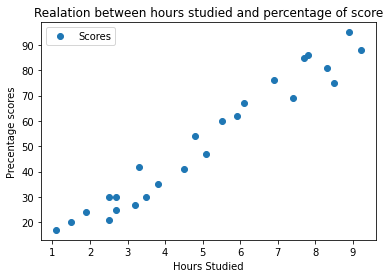

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Realation between hours studied and percentage of score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Precentage scores')  
plt.show()

## Observation:
we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Linear Regression Model

 After the data is prepared and after it has been cleaned and visualized, we will work with it with machine learning now

# Preparing the data 

Now we split data to input X (hours) and y (scores)

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

# Splitting data

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


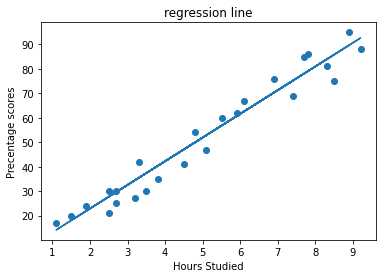

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('regression line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Precentage scores')  
plt.show()

### **Checking** : 
the accuracy for training set and test set

In [11]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9555444120520149
Training Score
0.9502283807217325


# Prediction 

Now that we have trained our algorithm, it's time to make some predictions

In [12]:
print(X_test) # Testing data -  Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred) #predicting data - scores

[[8.3]
 [5.1]
 [3.2]
 [2.5]
 [2.5]
 [7.7]
 [9.2]
 [4.8]]
[83.93180732 52.91505067 34.49885141 27.71393589 27.71393589 78.11616544
 92.65527012 50.00722973]


## ***compering***

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.931807
1,47,52.915051
2,27,34.498851
3,21,27.713936
4,30,27.713936
5,85,78.116165
6,88,92.655270
7,54,50.007230


# prediction 

In [14]:
# the question in the task
hours = 9.25
print('predicted Score of student who studied for 9.25 hours a day', regressor.predict([[hours]]))

predicted Score of student who studied for 9.25 hours a day [93.13990695]


In [15]:
# You can also test with your own data
hours = input()
print('predicted Score of student who studied for 9.25 hours a day', regressor.predict([[hours]]))

3.75
predicted Score of student who studied for 9.25 hours a day [39.82985645]


C:\Users\yasmeen\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# Evaluating the model 

In [16]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  5.109698042142334
Mean Squared Error:  29.390005963549946
Root Mean Squared Error:  5.421255017387574
R2 Score:  0.9555444120520149
